In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
import sklearn.metrics as metrics

In [3]:
letter = pd.read_csv('G:/CS Year 4/1st Semester/CSC399/Project/letter-recognition.csv')

In [4]:
# shape of datasets 

print ("Dataset Shape: ", letter.shape) 

# first five sample 

print ("Dataset: ",letter.head())

Dataset Shape:  (20000, 17)
Dataset:    letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


In [5]:
# printing letters (first attribute)

print(letter.letter)

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object


In [6]:
X=letter.iloc[:,1:-1]
y=letter.iloc[:,0]
print(X.head())
print(y.head())

   xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   xybar   \
0      2      8       3       5       1      8     13      0       6       6   
1      5     12       3       7       2     10      5      5       4      13   
2      4     11       6       8       6     10      6      2       6      10   
3      7     11       6       6       3      5      9      4       6       4   
4      2      1       3       1       1      8      6      6       6       6   

   x2ybar  xy2bar  xedge   xedgey  yedge   
0      10       8       0       8       0  
1       3       9       2       8       4  
2       3       7       3       7       3  
3       4      10       6      10       2  
4       5       9       1       7       5  
0    T
1    I
2    D
3    N
4    G
Name: letter, dtype: object


[]

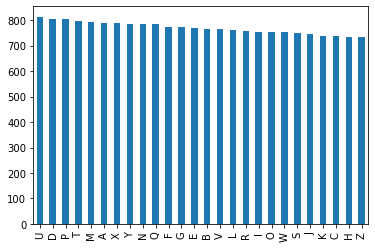

In [7]:
letter['letter'].value_counts().plot.bar()
plt.plot()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
rfc=RandomForestClassifier(n_estimators=245,criterion='entropy',random_state=0,min_samples_split=2)

rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=245, random_state=0)

In [10]:
y_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_pred)
print('Accuracy is :',ac*100)

Accuracy is : 96.85000000000001


In [12]:
X1=letter.iloc[:,:-1]
print(X1.head())
X1.shape

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   
0       6      10       8       0       8       0  
1      13       3       9       2       8       4  
2      10       3       7       3       7       3  
3       4       4      10       6      10       2  
4       6       5       9       1       7       5  


(20000, 16)

In [13]:
seed = 4353
# Instatiation, fitting and prediction

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [22]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

           A       0.95      0.98      0.97       147
           B       0.88      0.94      0.91       158
           C       0.96      0.97      0.97       156
           D       0.90      0.95      0.92       171
           E       0.90      0.91      0.91       145
           F       0.93      0.89      0.91       167
           G       0.88      0.90      0.89       182
           H       0.88      0.87      0.87       123
           I       0.94      0.94      0.94       127
           J       0.94      0.94      0.94       159
           K       0.93      0.90      0.91       143
           L       0.96      0.95      0.95       159
           M       0.97      0.97      0.97       173
           N       0.97      0.94      0.95       134
           O       0.94      0.94      0.94       142
           P       0.95      0.91      0.93       165
           Q       0.93      0.96      0.95       145
           R       0.88    

TypeError: 'list' object is not callable

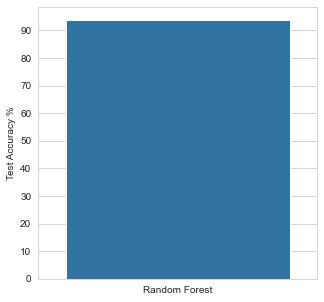

In [23]:
# Comapring the accuracy for various models

model = ['Random Forest']
acc = [rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("")
sns.barplot(x= model, y= acc)
plt.show()

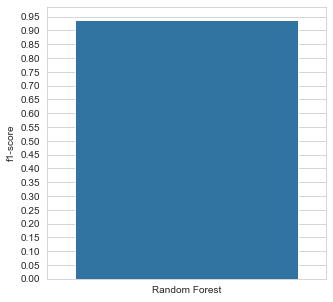

In [24]:
# Comparing the f1-score for various models

model = ['Random Forest']
f1_score = [rfc_f1]

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("")
sns.barplot(x= model,  y= f1_score)
plt.show()